DATA ANALYTICS COMP47350 Homework I Question I 

This section of the code will serve as basis to create a data quality report for my CSV file covid19-cdc-22202474.csv. 

The instruction are the following: 

- (a) Check how many rows and columns your dataset has.
- (b) Print the first and the last 5 rows.
- (c) Convert the features to their appropriate data types (e.g., decide which features are more appropriate as continuous and which ones as categorical types). 
- (d) Look for duplicate rows and columns. Consider whether it makes sense to keep them or drop them.
- (e) Look for constant columns. Consider whether it makes sense to keep them or drop them. 
- (f) Save your updated/cleaned data frame to a new csv file.

For the updated CSV and data frame (after column/row removal):

- (g) Prepare a table with descriptive statistics for all the continuous features.
- (h) Prepare a table with descriptive statistics for all the categorical features.
- (i) Plot histograms for all the continuous features.
- (j) Plot box plots for all the continuous features.
- (k) Plot bar plots for all the categorical features.
- Discuss your initial findings from the tables and plots. 
- Save the initial discussion of your findings into a single data quality report PDF file. 

The PDF report should focus on the key issues identified in the data and discuss potential strategies to handle them. Simple listing of tables and plots without discussion of findings will not receive full marks. To receive full marks you need to show your understanding and analysis of the dataset, through a detailed discussion for each feature. The report should be concise and complete, the goal is not to make it long for the sake of length, but to cover all the important aspects of the features.

Before starting the assignment tasks, this code snipet will import relevant packages needed and set up some display options that will be needed. 

In [80]:
# Import package pandas for data analysis
import pandas as pd
# Import package numpy for numeric computing
import numpy as np
# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt
# Import package for display
from IPython.display import display
# Import package random for data imputation
import random
# Import package random for plot visualisation
import seaborn as sns

#For showing plots directly in the notebook (https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline)
%matplotlib inline

# set display options for output format (asdjustments inspired by https://stackoverflow.com/questions/11707586/how-do-i-expand-the-output-display-to-see-more-columns-of-a-pandas-dataframe)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

(a) Check how many rows and columns your dataset has.

In [3]:
# file path of CSV
file_path = r'C:\Users\MSI-Pc\Desktop\Data Analytics\covid19-cdc-22202474.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Check how many rows and columns the dataset has
print('The dataset has ' + str(df.shape[0]) + ' rows and ' + str(df.shape[1]) + ' columns.')

The dataset has 20000 rows and 19 columns.


(b) Print the first and the last 5 rows.

In [4]:
# Print the first and the last 5 rows (https://stackoverflow.com/questions/58260771/how-to-show-firstlast-n-rows-of-a-dataframe)
print('The first 5 rows are:')
display(df.head())
print('The last 5 rows are:')
display(df.tail())

The first 5 rows are:


case_month res_state  state_fips_code   res_county  county_fips_code       age_group   sex     race            ethnicity  case_positive_specimen_interval  case_onset_interval               process exposure_yn             current_status symptom_status  hosp_yn   icu_yn death_yn underlying_conditions_yn
0    2022-01        FL             12.0         POLK           12105.0       65+ years  Male    White  Non-Hispanic/Latino                              0.0                  NaN               Missing     Missing  Laboratory-confirmed case        Missing      Yes  Missing      Yes                      NaN
1    2021-07        FL             12.0     SARASOTA           12115.0       65+ years  Male    White  Non-Hispanic/Latino                              0.0                  NaN               Missing     Missing  Laboratory-confirmed case        Missing  Missing  Missing      Yes                      NaN
2    2021-07        NV             32.0        CLARK           32003.0  18 to 49 years  Male    Black  Non-Hispanic/Latino                              0.0                  NaN  Routine surveillance     Missing  Laboratory-confirmed case    Symptomatic      Yes  Unknown      Yes                      NaN
3    2020-12        CA              6.0  LOS ANGELES            6037.0       65+ years  Male    White      Hispanic/Latino                              NaN                  0.0               Missing     Missing  Laboratory-confirmed case    Symptomatic      Yes      Yes      Yes                      NaN
4    2021-01        TX             48.0       DALLAS           48113.0       65+ years  Male  Unknown              Unknown                              NaN                  NaN               Missing     Missing  Laboratory-confirmed case        Missing      Yes  Missing      Yes                      NaN

The last 5 rows are:


case_month res_state  state_fips_code       res_county  county_fips_code       age_group     sex   race            ethnicity  case_positive_specimen_interval  case_onset_interval  process exposure_yn             current_status symptom_status hosp_yn   icu_yn death_yn underlying_conditions_yn
19995    2022-01        KY             21.0        JEFFERSON           21111.0  18 to 49 years    Male  White  Non-Hispanic/Latino                              0.0                  NaN  Missing     Missing  Laboratory-confirmed case        Missing      No  Missing       No                      NaN
19996    2020-10        MD             24.0        BALTIMORE           24005.0  18 to 49 years    Male  Black  Non-Hispanic/Latino                              NaN                  NaN  Missing     Missing  Laboratory-confirmed case        Missing      No  Missing       No                      NaN
19997    2020-08        ID             16.0       BONNEVILLE           16019.0  50 to 64 years  Female  White  Non-Hispanic/Latino                              0.0                  NaN  Missing         Yes  Laboratory-confirmed case    Symptomatic      No  Missing       No                      NaN
19998    2021-11        VT             50.0       CHITTENDEN           50007.0  50 to 64 years  Female  White  Non-Hispanic/Latino                              1.0                  0.0  Missing     Missing  Laboratory-confirmed case    Symptomatic      No  Missing       No                      NaN
19999    2022-01        VA             51.0  ALEXANDRIA CITY           51510.0    0 - 17 years    Male    NaN                  NaN                              NaN                  0.0  Missing     Missing  Laboratory-confirmed case    Symptomatic      No  Missing       No                      NaN

(c) Convert the features to their appropriate data types (e.g., decide which features are more appropriate as continuous and which ones as categorical types). 

The following distribution for features was chosen: 

- Categorical (qualitative variables): case_month, res_state, fips code, res county, county fips, age group, sex, race, ethnicity, process, exposure, current_status, symptom_status, hosp_yn, icu_yn, death_yn, and underlying_conditions_yn.

- Continuous (quantitative variables): case_positive_specimen_interval, and case_onset_interval. 

The continuous features were converted to numeric (https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html) just to ensure they have the correct data type (could be some numerical data saved as strings). 

In [5]:
# Convert the features to their appropriate data types
df['case_positive_specimen_interval'] = pd.to_numeric(df['case_positive_specimen_interval'])
df['case_onset_interval'] = pd.to_numeric(df['case_onset_interval'])
df['case_month'] = df['case_month'].astype('category')
df['res_state'] = df['res_state'].astype('category')
df['state_fips_code'] = df['state_fips_code'].astype('category')
df['res_county'] = df['res_county'].astype('category')
df['county_fips_code'] = df['county_fips_code'].astype('category')
df['age_group'] = df['age_group'].astype('category')
df['sex'] = df['sex'].astype('category')
df['race'] = df['race'].astype('category')
df['ethnicity'] = df['ethnicity'].astype('category')
df['process'] = df['process'].astype('category')
df['exposure_yn'] = df['exposure_yn'].astype('category')
df['current_status'] = df['current_status'].astype('category')
df['symptom_status'] = df['symptom_status'].astype('category')
df['hosp_yn'] = df['hosp_yn'].astype('category')
df['icu_yn'] = df['icu_yn'].astype('category')
df['death_yn'] = df['death_yn'].astype('category')
df['underlying_conditions_yn'] = df['underlying_conditions_yn'].astype('category')

(d) Look for duplicate rows and columns. Consider whether it makes sense to keep them or drop them.

Please refer to the Data Quality Report for the rationale behind the decision to drop the duplicate rows. Duplicate found based on https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

In [6]:
# Show duplicate rows
duplicate_rows = df[df.duplicated()]
print(f'There are {len(duplicate_rows)} duplicate rows:')
display(duplicate_rows)

# drop duplicate rows based on all columns (inplace=True ensures that this is applied to the current data frame and not a new one)
df.drop_duplicates(inplace=True)

There are 1112 duplicate rows:


case_month res_state state_fips_code            res_county county_fips_code       age_group      sex                           race            ethnicity  case_positive_specimen_interval  case_onset_interval               process exposure_yn             current_status symptom_status  hosp_yn   icu_yn death_yn underlying_conditions_yn
105      2021-04        IL            17.0                  COOK          17031.0       65+ years   Female                          Black  Non-Hispanic/Latino                              1.0                  0.0               Missing     Missing  Laboratory-confirmed case        Missing      Yes  Missing      Yes                      NaN
123      2020-07        FL            12.0            MIAMI-DADE          12086.0       65+ years     Male                          White      Hispanic/Latino                              NaN                  NaN               Missing     Missing  Laboratory-confirmed case        Missing  Missing  Missing      Yes                      NaN
151      2021-12        CA             6.0           LOS ANGELES           6037.0       65+ years     Male                          White  Non-Hispanic/Latino                              NaN                  NaN               Missing     Missing  Laboratory-confirmed case    Symptomatic      Yes      Yes      Yes                      NaN
153      2022-01        FL            12.0            MIAMI-DADE          12086.0       65+ years     Male                          White      Hispanic/Latino                              0.0                  NaN               Missing     Missing  Laboratory-confirmed case        Missing      Yes  Missing      Yes                      NaN
173      2022-01        FL            12.0            MIAMI-DADE          12086.0       65+ years     Male                          White      Hispanic/Latino                              0.0                  NaN               Missing     Missing  Laboratory-confirmed case        Missing      Yes  Missing      Yes                      NaN
195      2020-07        FL            12.0               BROWARD          12011.0       65+ years     Male                          White      Hispanic/Latino                              NaN                  0.0               Missing     Missing  Laboratory-confirmed case    Symptomatic      Yes  Missing      Yes                      NaN
210      2021-01        IL            17.0                   NaN              NaN       65+ years     Male                          White  Non-Hispanic/Latino                              NaN                  0.0               Missing     Missing              Probable Case        Missing  Missing  Missing      Yes                      NaN
274      2020-12        AZ             4.0                  YUMA           4027.0       65+ years     Male                          White      Hispanic/Latino                              NaN                  NaN               Missing     Missing  Laboratory-confirmed case        Missing      Yes  Missing      Yes                      NaN
446      2020-03        NY            36.0                 KINGS          36047.0       65+ years     Male                          Black  Non-Hispanic/Latino                              0.0                  NaN               Missing     Missing  Laboratory-confirmed case        Unknown      Yes  Unknown      Yes                      Yes
485      2020-12        AZ             4.0                  YUMA           4027.0       65+ years     Male                          White      Hispanic/Latino                              NaN                  NaN               Missing     Missing  Laboratory-confirmed case        Missing      Yes  Missing      Yes                      NaN
502      2021-01        CA             6.0           LOS ANGELES           6037.0       65+ years     Male                          White      Hispanic/Latino                              NaN                  NaN               Missing     Missing  Laborat

Here although it is found that there are no duplicate columns, I decided to drop the 'columns state_fips_code' and 'county_fips_code', because the data these columns provide are redundant with the state and county columns. 

In [7]:
# Show duplicate columns
duplicate_mask = df.columns.duplicated()
duplicate_count = duplicate_mask.sum()
if duplicate_count == 0:
    print('There are no duplicate columns')
else:
    duplicate_columns = df.loc[:, duplicate_mask]
    print(f'There are {duplicate_count} duplicate columns:')
    display(duplicate_columns)
    
# Drop the columns state_fips_code and county_fips_code
df = df.drop(['state_fips_code', 'county_fips_code'], axis=1)

There are no duplicate columns


(e) Look for constant columns. Consider whether it makes sense to keep them or drop them. 

Found using this: https://studymachinelearning.com/pandas-how-to-remove-dataframe-columns-with-constant-same-values/

In [8]:
# Look for constant columns
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
if len(constant_columns) > 0:
    print(f'There are {len(constant_columns)} constant columns:')
    display(constant_columns)
else:
    print('There are no constant columns')
# df = df.drop(columns=constant_columns) There are no constant columns so no need to drop them

There are no constant columns


(f) Save your updated/cleaned data frame to a new csv file.

Found using this: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

In [9]:
# Save the updated/cleaned data frame to a new csv file
df.to_csv('covid19-cdc-22202474-cleanv1.csv', index=False)

(g) For the updated CSV and data frame, prepare a table with descriptive statistics for all the continuous features.

df[continuous_features].nunique() calculates unique values for continuous feature. .to_frame() converts the result into a DataFrame. .transpose() switches the rows and columns of the DataFrame, so that the continuous features become the column. Finally, .rename(index={0: 'cardinality'}) renames the row index to 'cardinality'. Same thing for missing_values. 

In [10]:
# read new CSV file into pandas DataFrame
df = pd.read_csv('covid19-cdc-22202474-cleanv1.csv')

# continuous features
continuous_features = ['case_positive_specimen_interval', 'case_onset_interval']

# table with descriptive statistics 
# Add cardinality and missing values information
desc_stats = df[continuous_features].describe()
cardinality = df[continuous_features].nunique().to_frame().transpose().rename(index={0: 'cardinality'})
missing_values = df[continuous_features].isnull().sum().to_frame().transpose().rename(index={0: 'missing_values'})

# Concatenate the additional statistics to the existing description
desc_stats_extended = pd.concat([desc_stats, cardinality, missing_values], axis=0)

# Display the extended descriptive statistics table
display(desc_stats_extended)

case_positive_specimen_interval  case_onset_interval
count                              10036.000000          8313.000000
mean                                   0.203069            -0.025863
std                                    2.519167             1.764035
min                                  -85.000000           -60.000000
25%                                    0.000000             0.000000
50%                                    0.000000             0.000000
75%                                    0.000000             0.000000
max                                   78.000000            52.000000
cardinality                           50.000000            46.000000
missing_values                      8852.000000         10575.000000

(h) Prepare a table with descriptive statistics for all the categorical features.

To serve as a useful reference point we will first use the value_counts() method to get the frequency of unique values in each categorical column (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html). A second part of this code will create a descriptive table that will further analyse categorical features. 

In [11]:
categorical_features = ['case_month', 'res_state', 'res_county', 'age_group', 'sex', 'race', 'ethnicity', 'process', 'exposure_yn', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn', 'death_yn', 'underlying_conditions_yn']

for col in categorical_features:
    print('Column:', col)
    print(df[col].value_counts())
    print('\n')

Column: case_month
2022-01    2413
2020-12    1600
2021-01    1294
2020-11    1272
2021-12    1272
2021-08     822
2021-09     748
2020-04     679
2021-11     645
2020-10     620
2022-05     539
2021-10     522
2021-02     486
2020-07     478
2021-03     447
2022-07     423
2021-04     412
2022-08     400
2022-06     389
2022-02     381
2020-08     379
2021-07     346
2020-05     328
2020-06     305
2020-09     295
2020-03     266
2022-04     238
2022-09     229
2021-05     201
2022-10     181
2022-03      99
2021-06      86
2022-11      82
2020-01       8
2020-02       3
Name: case_month, dtype: int64


Column: res_state
NY    1926
NC    1679
NJ    1640
FL    1482
IN    1050
OH    1047
TX    1028
MN     952
CA     665
KY     659
MD     656
MI     523
KS     488
AZ     471
PA     420
VA     397
SC     307
WI     275
NV     260
TN     252
OR     242
MA     236
OK     217
IL     212
UT     205
AR     171
ID     167
ME     155
CO     142
RI     134
AL      93
MO      88
MT      80
DC     

In [16]:
# categorical features
categorical_features = ['case_month', 'res_state', 'res_county', 'age_group', 'sex', 'race', 'ethnicity', 'process', 'exposure_yn', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn', 'death_yn', 'underlying_conditions_yn']

# Calculate mode statistics for categorical features
# takes panda column as input and calculates mode, freq, 2nd mode, and its freq.
# normalise to obtain relative frequency, then convert to percentage
def mode_stats(series):
    value_counts = series.value_counts(normalize=True) * 100
    mode_stats = {
        'mode': value_counts.index[0],
        'freq_mode': value_counts.iloc[0],
        '2ndmode': value_counts.index[1] if len(value_counts) > 1 else None,
        'freq_2ndmode': value_counts.iloc[1] if len(value_counts) > 1 else None,
    }
    return pd.Series(mode_stats)

#  return a DataFrame of the mode statistics for each categorical feature
mode_stats_df = df[categorical_features].apply(mode_stats).transpose()

# Combine mode statistics with the original categorical features table
cat_desc_stats = df[categorical_features].describe(include='all').transpose()
cat_desc_stats['unique'] = cat_desc_stats['unique'].fillna(0).astype(int)

cat_desc_stats = cat_desc_stats[['count', 'unique']].join(mode_stats_df)
cat_desc_stats.index.name = 'Feature'
cat_desc_stats.columns = ['Count', 'Unique', 'Mode', 'Freq_Mode', '2nd Mode', 'Freq_2nd Mode']

cat_desc_stats['Freq_Mode'] = cat_desc_stats['Freq_Mode'].map('{:.2f}%'.format)
cat_desc_stats['Freq_2nd Mode'] = cat_desc_stats['Freq_2nd Mode'].map('{:.2f}%'.format)

# Add missing values count
missing_values = df[categorical_features].isnull().sum().to_frame('Missing_Values')
cat_desc_stats = cat_desc_stats.join(missing_values)

# Display the table with proper formating 
print('\nDescriptive statistics for categorical features:\n')
display(cat_desc_stats.style.set_properties(subset=['Mode', '2nd Mode'], **{'text-align': 'left'}))


Descriptive statistics for categorical features:



(i) Plot histograms for all the continuous features.

Built using: https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html#:~:text=The%20first%20two%20optional%20arguments,the%20list%20of%20created%20Axes.

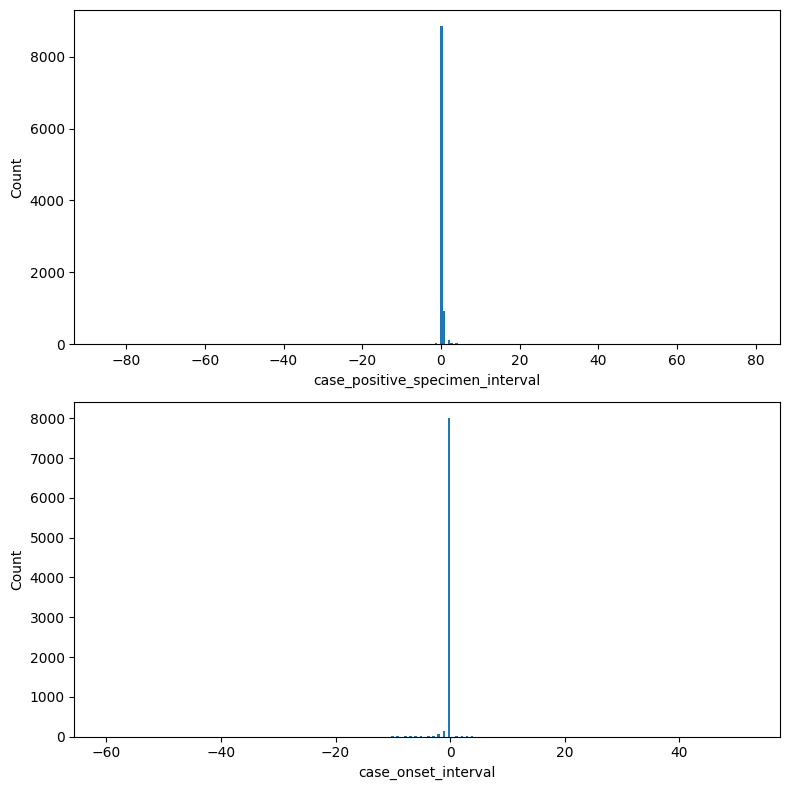

In [18]:
# continuous features
features = ['case_positive_specimen_interval', 'case_onset_interval']

# Plot histograms for the features
fig, axs = plt.subplots(len(features), 1, figsize=(8, 8))
for i, feature in enumerate(features):
    axs[i].hist(df[feature], bins=250)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

(j) Plot box plots for all the continuous features.

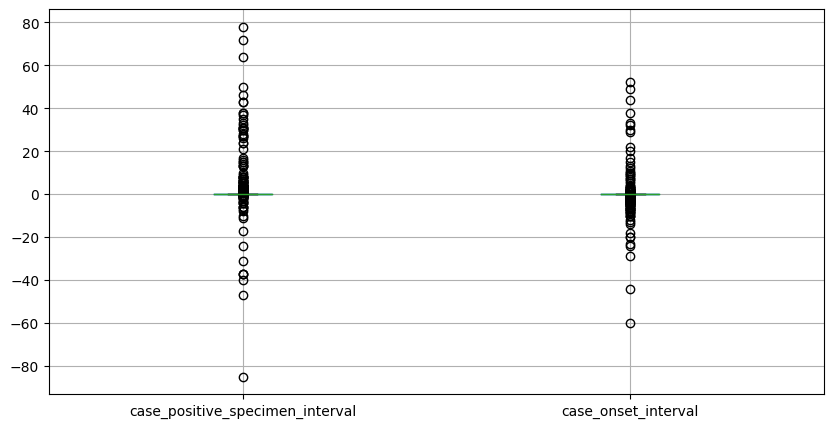

In [13]:
# Plot box plots for all the continuous features
df[continuous_features].boxplot(figsize=(10, 5))
plt.show()

(k) Plot bar plots for all the categorical features.

Built using: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/ and Matplotlib documentation.

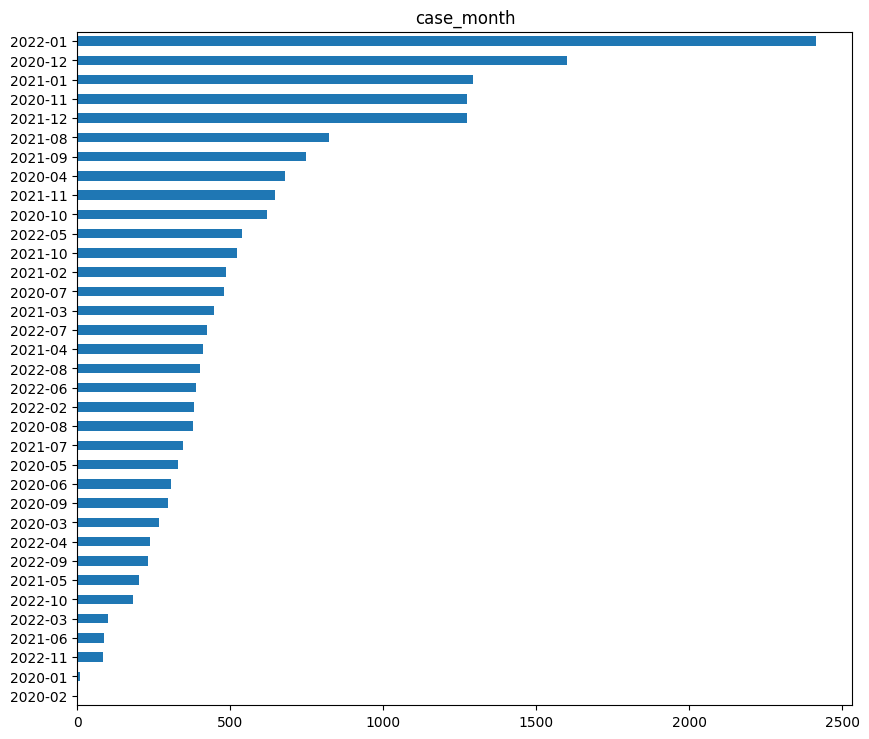

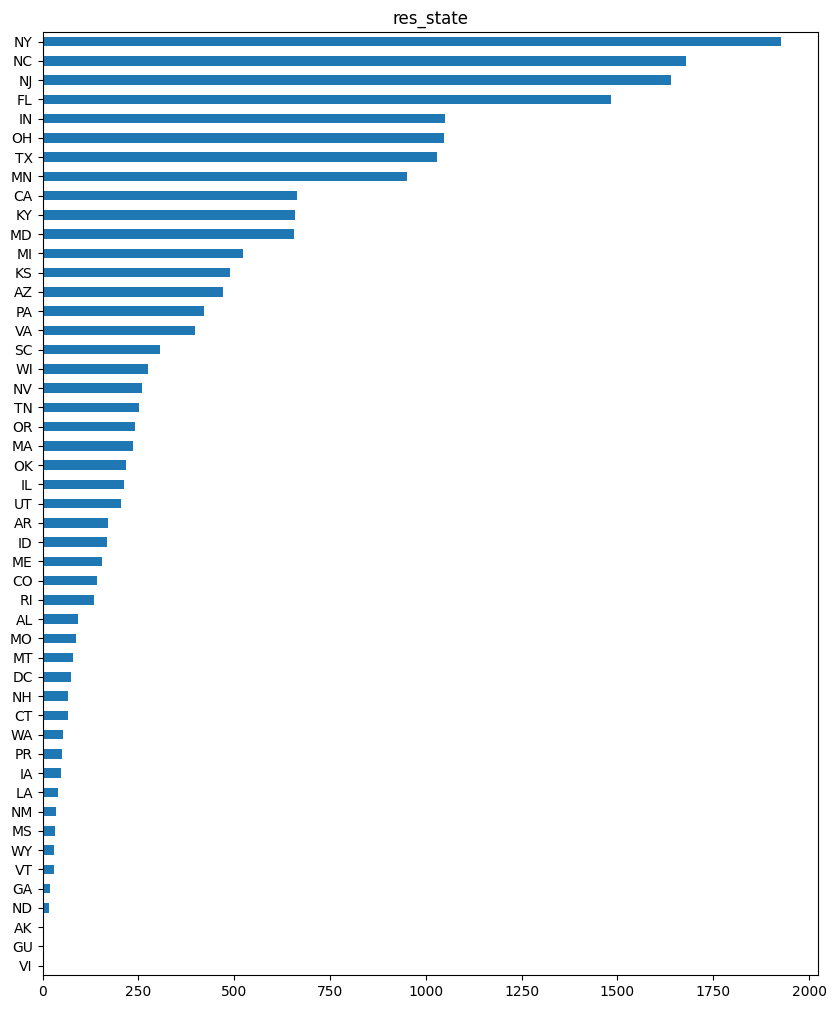

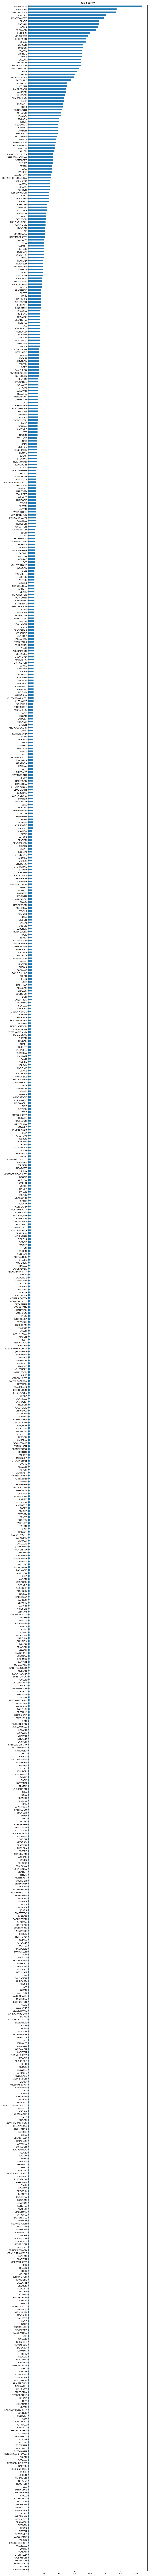

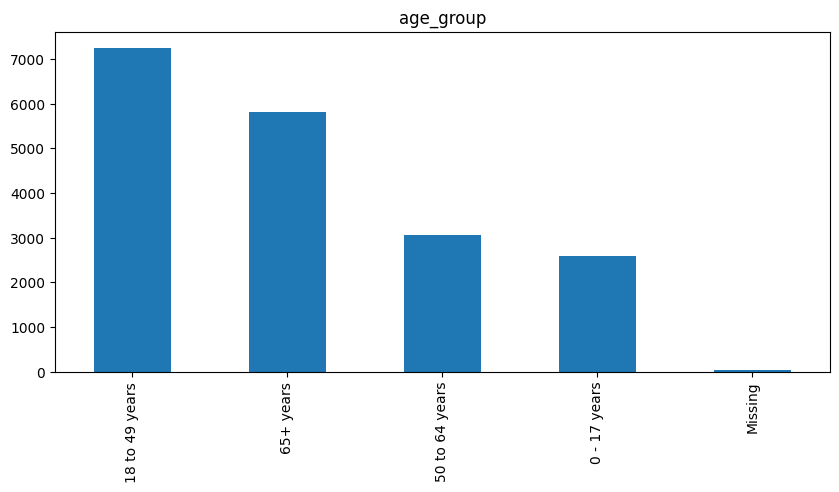

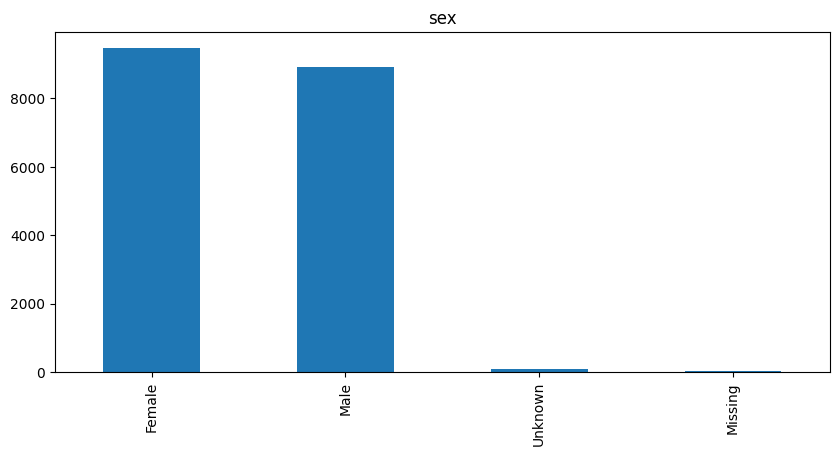

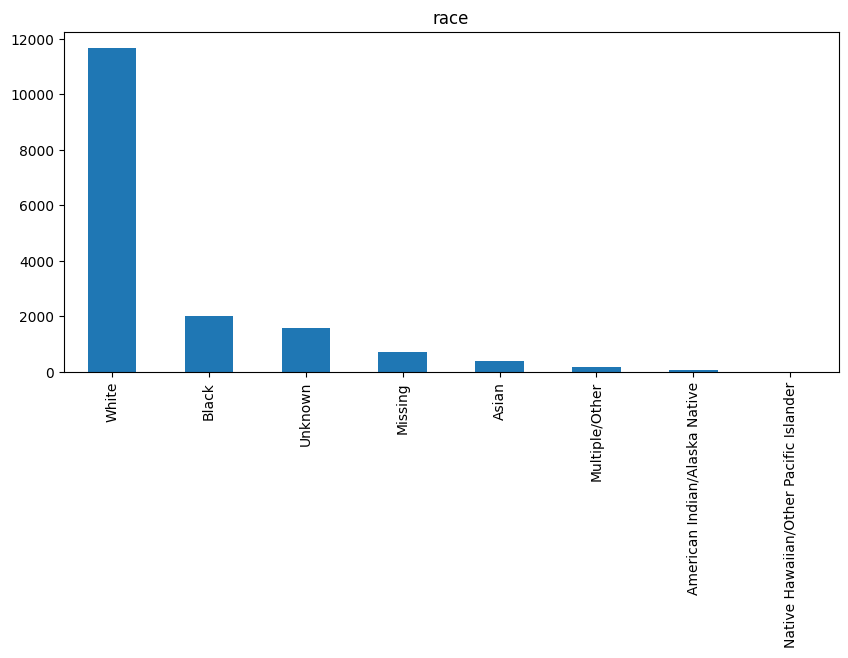

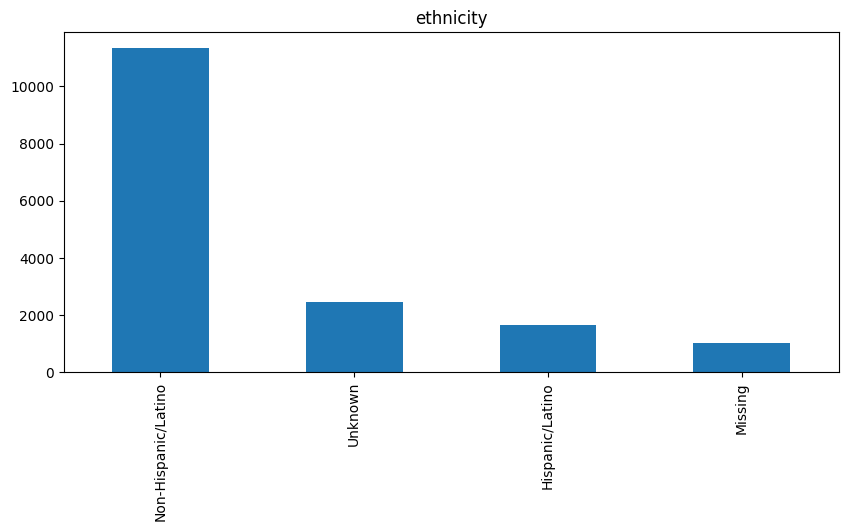

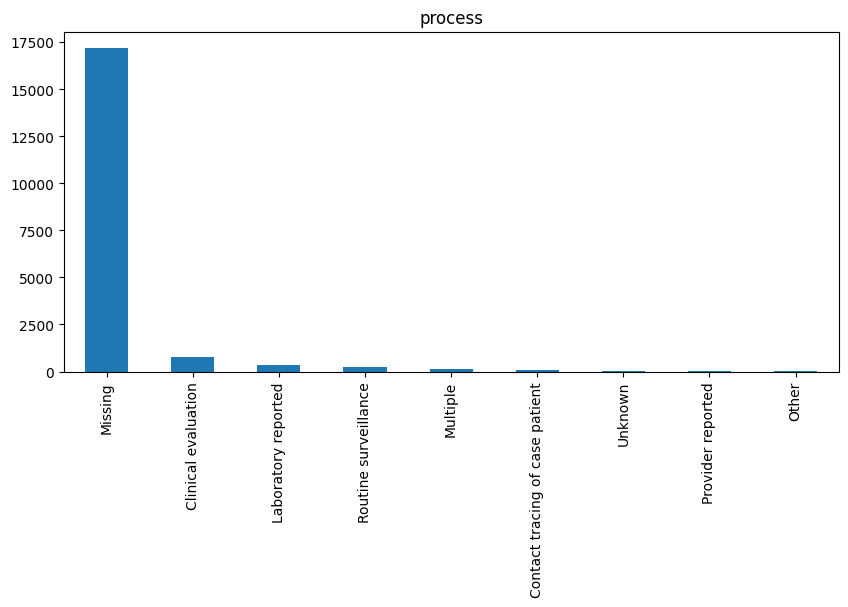

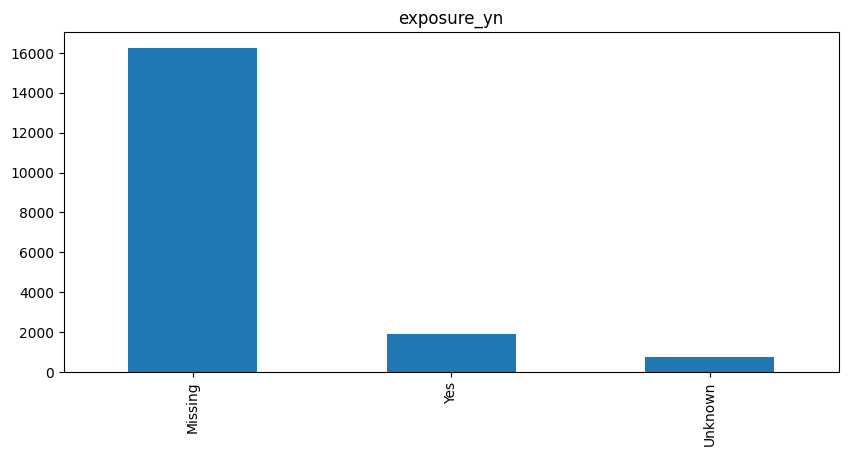

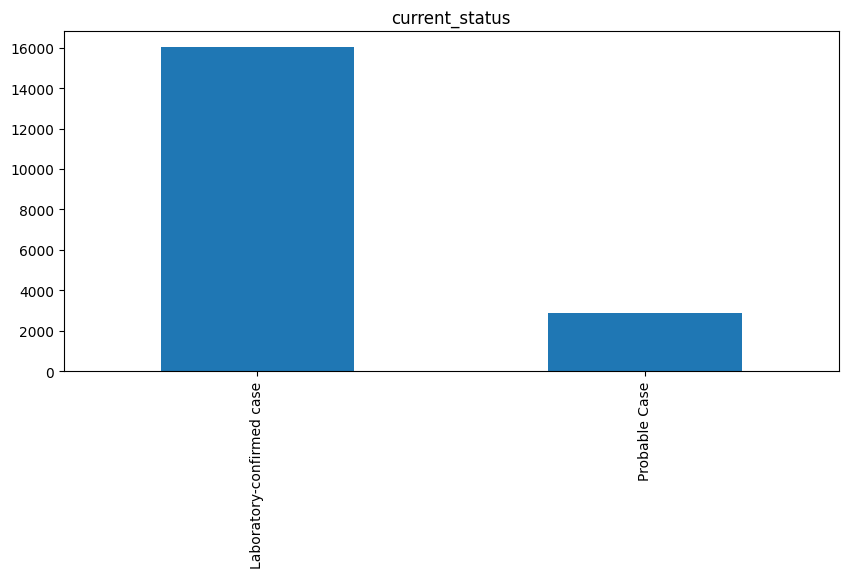

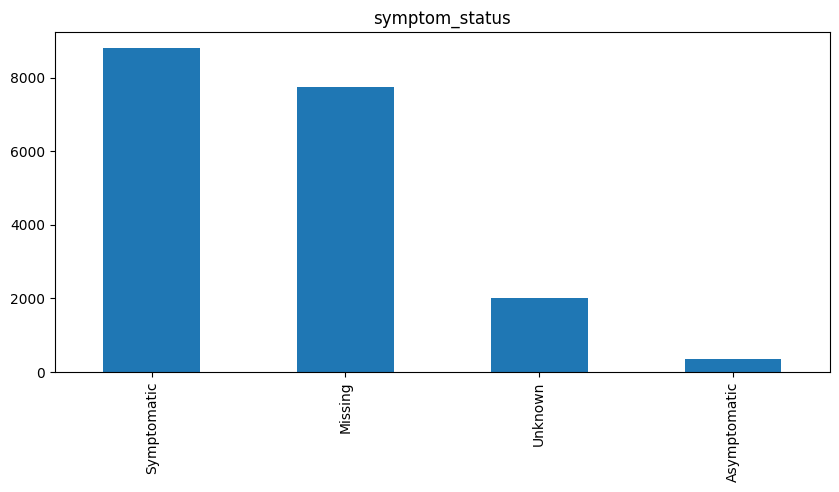

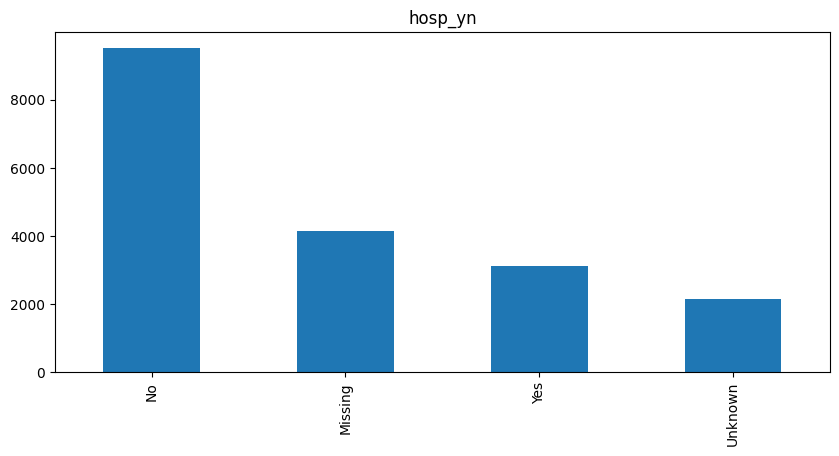

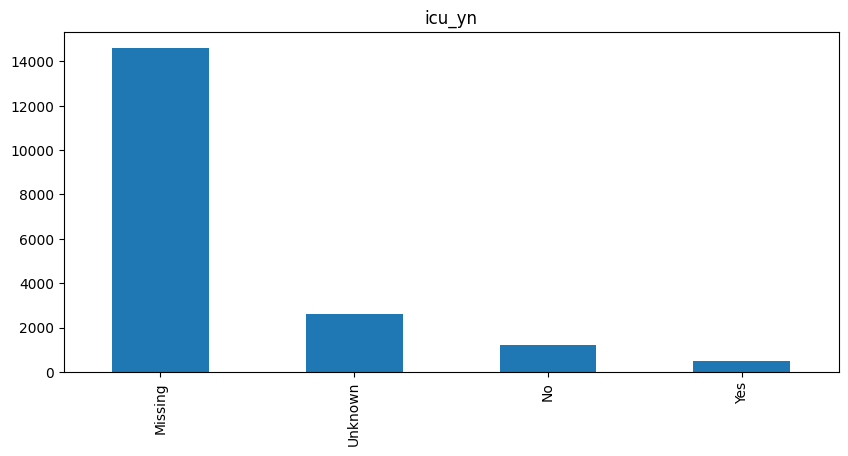

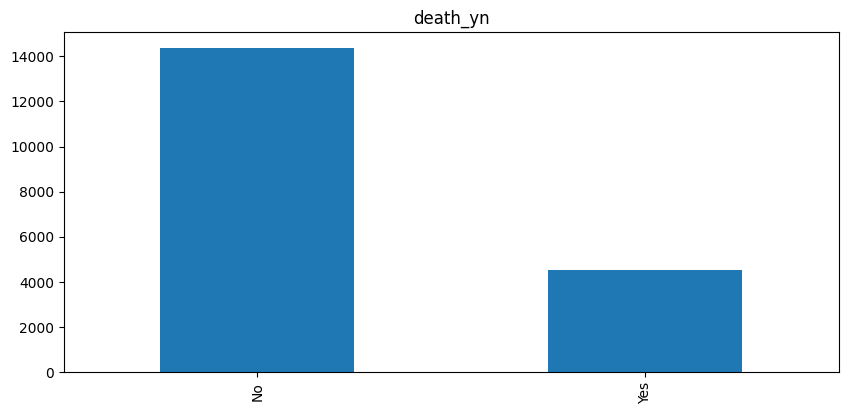

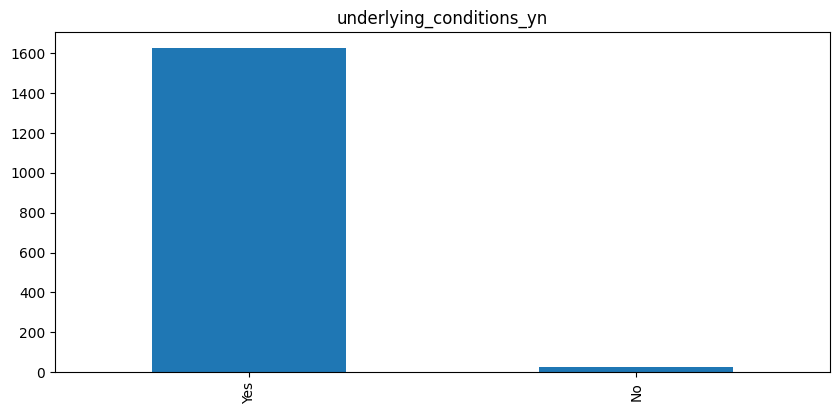

In [19]:
# Plot bar plots for all the categorical features
# checks unique value for features and if +20 will make horizontal bar plot for better readability
for feature in categorical_features:
    value_counts = df[feature].value_counts()
    if len(value_counts) > 20: # if there are more than 20 unique values
        plt.figure(figsize=(10, len(value_counts)/4)) # adjust the figure size
        ax = value_counts.plot(kind='barh')
        ax.invert_yaxis() # invert the y-axis to show largest values on top
    else:
        value_counts.plot(kind='bar', figsize=(10, 5))
        plt.subplots_adjust(bottom=0.2) # adjust the spacing of the x-axis labels
    plt.title(feature)
    plt.show()

DATA ANALYTICS COMP47350 Homework I Question II

I prepared a Data Quality Plan based on the findings of the Data Quality Report, by marking down all the potential data quality issues and proposing argumented solutions accordingly. 

Based on the findings of the Data Quality Report and the Data Quality Plan, we will apply the data quality solutions identified to the latest version of the CSV file. 

- Data Quality Issue: Inconsistent value entry for missing values (either ‘Missing’, ‘Unknown’, or a blank entry).
- Implemented solution: Replace every ‘Unknown’ or blank entry to the consistent NaN provided by Numpy.

In [44]:
# read CSV file into pandas DataFrame
df = pd.read_csv('covid19-cdc-22202474-cleanv1.csv')

# Function to standardize missing values
def standardize_missing(value):
    missing_strings = ['Unknown', 'unknown', 'missing', 'Missing']
    is_blank = isinstance(value, str) and value.strip() == ''
    
    if value in missing_strings or pd.isnull(value) or is_blank:
        return np.nan

    return value

# Apply the function to the entire DataFrame
for column in df.columns:
    df[column] = df[column].apply(standardize_missing)

- Data Quality Issue: illogical negative values for continuous variables. 
- Implemented solution: Replace negative values with 'Missing' as it is not possible to determine whether these are due to sign errors. 

In [45]:
# Replace negative values in case_onset_interval with NaN
df['case_onset_interval'] = df['case_onset_interval'].apply(lambda x: np.nan if pd.notna(x) and x < 0 else x)

# Replace negative values in case_positive_specimen_interval with NaN
df['case_positive_specimen_interval'] = df['case_positive_specimen_interval'].apply(lambda x: np.nan if pd.notna(x) and x < 0 else x)


- Data Quality Issue: 1186 missing county values. 
- Implemented solution: Impute missing values based on the non-missing county feature distribution, but ensuring the state feature matches the new attribution. 

Made use of: https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html and other documentations.

In [46]:
# Define a function to impute missing county values based on state and non-missing county distribution
def impute_county(row):
    # Check if the county value is missing
    if pd.isna(row["res_county"]):
        # Get the state of the current row
        state = row["res_state"]
        
        # Create a subset of the dataset containing only rows with the same state and non-missing county values
        available_counties = df[df["res_state"] == state]["res_county"].dropna()
        
        # Check if there are any non-missing county values for the current state
        if not available_counties.empty:
            # Calculate the probability distribution of the existing counties within the current state
            probabilities = available_counties.value_counts(normalize=True)
            
            # Impute a county value based on the calculated probability distribution
            return np.random.choice(probabilities.index, p=probabilities.values)
    
    # Return the original county value if it's not missing
    return row["res_county"]

# Apply the function to impute missing county values
df["res_county"] = df.apply(impute_county, axis=1)

- Data Quality Issue: 29 missing age group values. 
- Implemented solution: Removal of rows with missing age group information. 

In [47]:
# Remove the rows with NaN age group information
df = df.dropna(subset=['age_group'])

- Data Quality Issue: 398 missing sex values. 
- Implemented solution: Impute missing values based on the non-missing sex feature distribution 

In [48]:
# Calculate the probabilities for each unique value in the 'sex' column (excluding 'Missing')
sex_counts = df[df['sex'].notnull()]['sex'].value_counts(normalize=True)

# Define a function to impute 'Missing' values with a random choice based on the distribution
def impute_sex(value):
    if pd.isnull(value):
        return np.random.choice(sex_counts.index, p=sex_counts.values)
    return value

# Apply the impute_sex function to the 'sex' column
df['sex'] = df['sex'].apply(impute_sex)

- Data Quality Issue: 4534 missing race values. 
- Implemented solution: Impute missing values based on the non-missing race feature distribution 

In [49]:
# Calculate the probabilities for each unique value in the 'race' column (excluding 'Missing')
race_counts = df[df['race'].notnull()]['race'].value_counts(normalize=True)

# Define a function to impute 'Missing' values with a random choice based on the distribution
def impute_race(value):
    if pd.isnull(value):
        return np.random.choice(race_counts.index, p=race_counts.values)
    return value

# Apply the impute_race function to the 'race' column
df['race'] = df['race'].apply(impute_race)


- Data Quality Issue: 5911 missing ethnicity values. 
- Implemented solution: Impute missing values based on the non-missing ethnicity feature distribution.

In [50]:
# Replace 'Missing' values with NaN in 'ethnicity' column
df['ethnicity'] = df['ethnicity'].replace('Missing', np.nan)

# Calculate the probabilities for each unique value in the 'ethnicity' column (excluding NaN values)
ethnicity_counts = df['ethnicity'].value_counts(normalize=True)

# Define a function to impute NaN values with a random choice based on the distribution
def impute_ethnicity(value):
    if pd.isna(value):
        return np.random.choice(ethnicity_counts.index, p=ethnicity_counts.values)
    return value

# Apply the impute_ethnicity function to the 'ethnicity' column
df['ethnicity'] = df['ethnicity'].apply(impute_ethnicity)


- Data Quality Issue: 17251 missing case identification process values. 
- Implemented solution: drop the feature. 

In [51]:
# Drop the 'process' column
df.drop('process', axis=1, inplace=True)

- Data Quality Issue: 16996 missing exposure status values. 
- Implemented solution: drop the feature. 

In [52]:
# Drop the 'exposure_yn' column
df.drop('exposure_yn', axis=1, inplace=True)

- Data Quality Issue: 9739 missing symptom status values. 
- Implemented solution: drop the feature. 

In [53]:
# Drop the 'symptom_status' column
df.drop('symptom_status', axis=1, inplace=True)

- Data Quality Issue: 6281 missing hospitalisation values. 
- Implemented solution: Impute missing values based on the non-missing feature distribution.

In [54]:
# Replace 'Missing' with NaN in the hosp_yn column
df['hosp_yn'] = df['hosp_yn'].replace('Missing', np.nan)

# Calculate the probabilities of non-missing values in the hosp_yn column
non_missing_hosp = df[df['hosp_yn'].notna()]
hosp_probs = non_missing_hosp['hosp_yn'].value_counts(normalize=True)

# Function to impute hosp_yn based on non-missing distribution
def impute_hosp(row):
    if pd.isnull(row['hosp_yn']):
        return np.random.choice(hosp_probs.index, p=hosp_probs.values)
    else:
        return row['hosp_yn']

# Apply the impute_hosp function to each row of the DataFrame
df['hosp_yn'] = df.apply(impute_hosp, axis=1)


- Data Quality Issue: 17216 missing ICU values. 
- Implemented solution: drop the feature. 

In [55]:
# Drop the 'icu_yn' column
df.drop('icu_yn', axis=1, inplace=True)

- Data Quality Issue: 17237 missing underlying conditions values. 
- Implemented solution: drop the feature. 

In [56]:
# Drop the 'underlying_conditions_yn' column
df.drop('underlying_conditions_yn', axis=1, inplace=True)

Saving the new CSV file

In [57]:
df.to_csv("covid19-cdc-22202474-cleanv2-post_data_quality.csv", index=False)

DATA ANALYTICS COMP47350 Homework I Question III

Exploring relationships between feature pairs:

- Choose a subset of features you find promising and plot pairwise feature interactions (e.g., continuous-continuous feature plot or continuous-categorical plots or correlation plots). Explain your choices.
- Discuss your findings from the plots above. Do you find any features or feature combinations that are indicative of the target outcome? Explain in plain words (a short paragraph) the story of your findings so far.


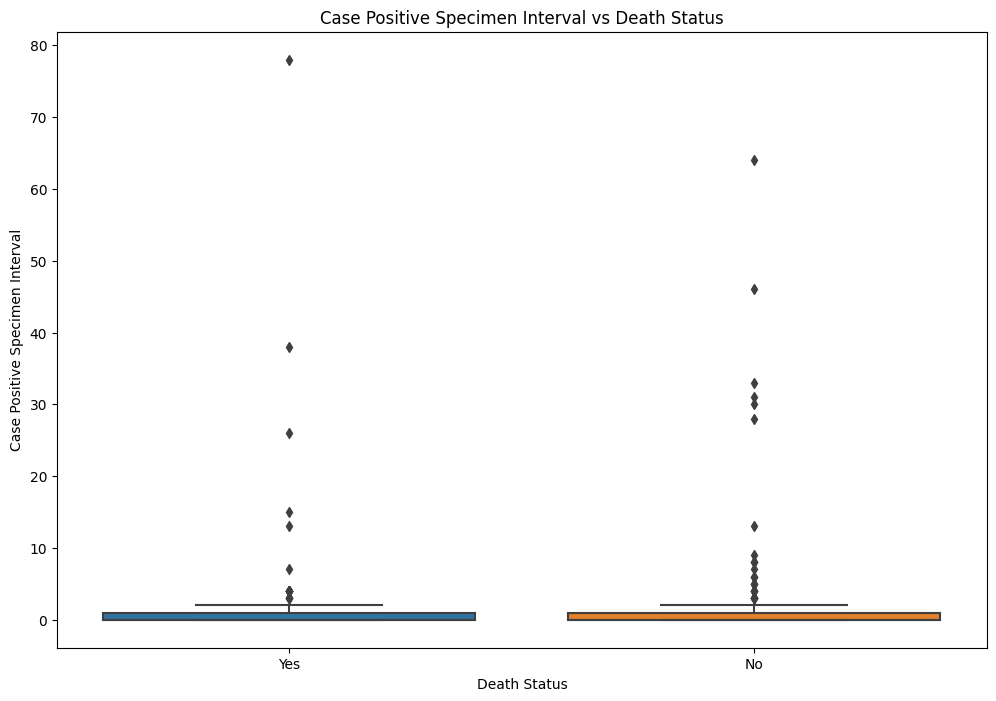

In [59]:
# read CSV file into pandas DataFrame
df = pd.read_csv('covid19-cdc-22202474-cleanv2-post_data_quality.csv')

# Filter rows with missing values in continuous variables
filtered_df = df[df['case_positive_specimen_interval'].notna()]
filtered_df = filtered_df[filtered_df['case_onset_interval'].notna()]

# Continuous-Categorical: case_positive_specimen_interval vs death_yn
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['death_yn'], y=filtered_df['case_positive_specimen_interval'])
plt.xlabel('Death Status')
plt.ylabel('Case Positive Specimen Interval')
plt.title('Case Positive Specimen Interval vs Death Status')
plt.show()

Pair selection rationale:
The pair "death" and CPSI was chosen to explore the relationship between the time from specimen collection to reporting and the likelihood of death. Understanding this relationship can provide insights into the impact of early detection and testing on patient outcomes.

Findings:
The plot of death and case positive specimen interval reveals that most deaths tend to occur when the CPSI is between 0 and 15 weeks. This suggests that there may be a higher risk of death when the time from specimen collection to reporting is shorter. However, it's important to note that a significant number of non-fatal cases also occur within the same interval, which shows the limited value of this feature for COVID-19 death prediction. 

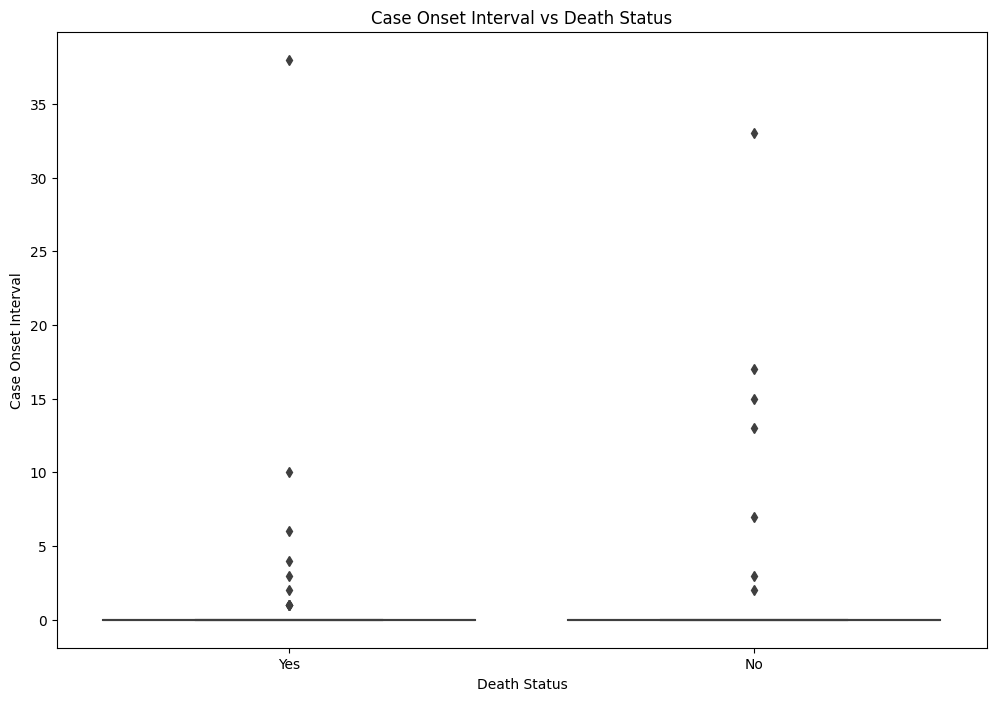

In [60]:
# Continuous-Continuous: case_onset_interval vs death_yn
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['death_yn'], y=filtered_df['case_onset_interval'])
plt.xlabel('Death Status')
plt.ylabel('Case Onset Interval')
plt.title('Case Onset Interval vs Death Status')
plt.show()

Pair selection rationale:
The pair "death" and COI was chosen to investigate the relationship between the time from symptom onset to reporting and the likelihood of death, which can help assess the importance of early diagnosis and management of COVID-19 in preventing fatal outcomes.

Findings:
The plot of death and case onset interval shows that most deaths predominantly occur when the COI is between 0 and 10 weeks. This suggests that a shorter time from symptom onset to reporting may be associated with a higher risk of death. For non-fatal cases, the COI tends to range from 0 to 35 weeks. Overall, the COI seems to provide limited insights into the risk of death. 

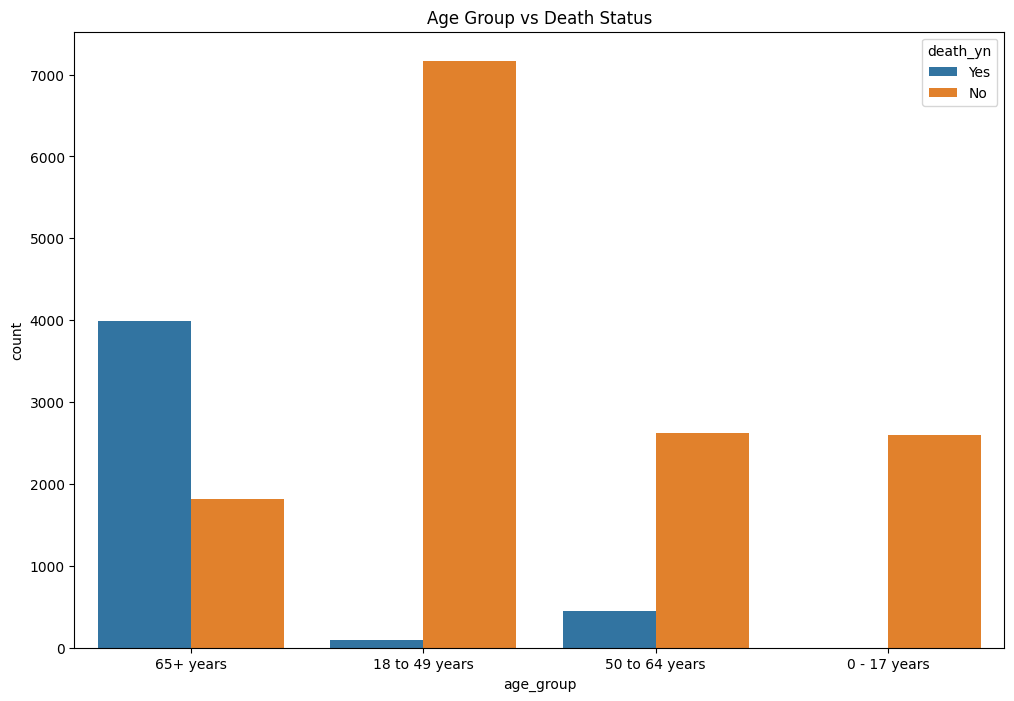

In [61]:
# Categorical-Categorical: age_group vs death_yn
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='age_group', hue='death_yn')
plt.title('Age Group vs Death Status')
plt.show()

Pair selection rationale:
The pair "death" and "age group" was chosen to examine the relationship between age and the likelihood of death due to COVID-19. Understanding the role of age in predicting fatal outcomes is important, as it helps to identify vulnerable populations.

Findings:
The age group 65 and older has the highest number of deaths, with approximately 4,000 deaths compared to 1,800 survivors, indicating a high risk of death. The age group 18-49 has very few deaths, suggesting a low risk of fatal outcomes. The age group 50-64 experiences a moderate risk of death, with about 15% of deaths. There are no recorded deaths in the 0-17 age group, indicating that this age group is at a very low risk of fatal outcomes. 

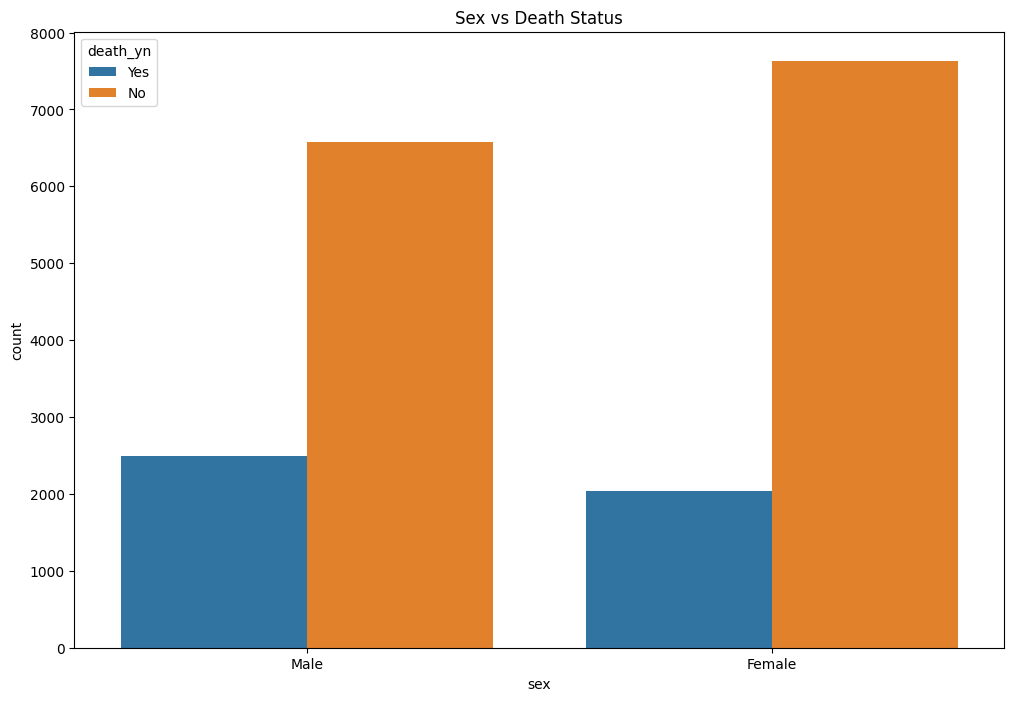

In [62]:
# Categorical-Categorical: sex vs death_yn
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='sex', hue='death_yn')
plt.title('Sex vs Death Status')
plt.show()

Pair selection rationale:
The pair "death" and "sex" was chosen to investigate the relationship between sex and the likelihood of death due to COVID-19, which can provide insights into potential biological, social, and behavioral factors that may contribute to differences in mortality rates between males and females.

Findings:
Males have a higher number of deaths compared to females, with approximately 2,400 male deaths and 1,800 female deaths, suggesting a higher risk of fatal outcomes due to COVID-19. A larger amount of females tend to have a no death outcome overall. Even though the sample size was slightly larger in terms of females, these relationships highlight that there may be sex-related differences in the risk of death due to COVID-19, with males appearing to be at a higher risk of fatal outcomes. 

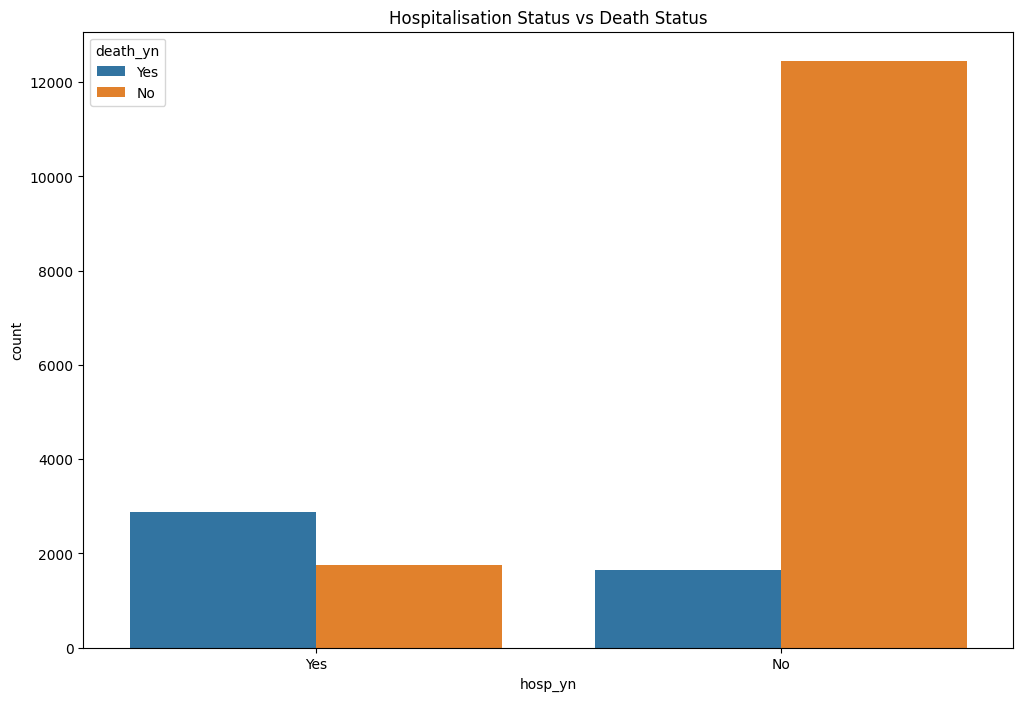

In [64]:
# Categorical-Categorical: hosp_yn vs death_yn
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='hosp_yn', hue='death_yn')
plt.title('Hospitalisation Status vs Death Status')
plt.show()

Pair selection rationale:
The pair "death" and "hospitalization status" was chosen to investigate the relationship between hospitalization and the likelihood of death due to COVID-19, which can provide insights into the severity of cases and the effectiveness of hospital care in preventing fatal outcomes. 

Findings:
For hospitalized patients, the number of deaths is significantly higher, with approximately 2,400 deaths and 1,800 survivors. In contrast, for non-hospitalized patients, the number of deaths is lower, with about 1,700 deaths and 12,200 survivors. This suggests that hospitalization is more common among severe cases of COVID-19, which are more likely to result in death. 

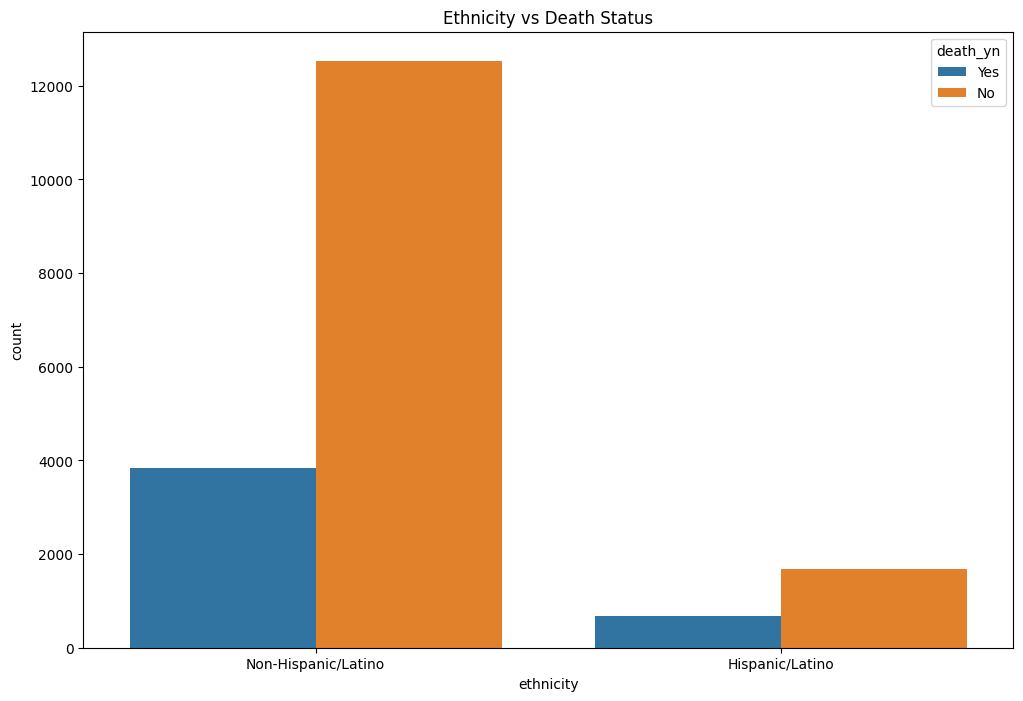

In [65]:
# Categorical-Categorical: ethnicity vs death_yn
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='ethnicity', hue='death_yn')
plt.title('Ethnicity vs Death Status')
plt.show()

Pair selection rationale:
The pair "death" and "ethnicity" was chosen to investigate the relationship between ethnicity and the likelihood of death due to COVID-19, which can provide insights into potential disparities in healthcare access, social determinants of health and their relation to mortality rates across ethnic groups.

Findings:
For Non-Hispanic individuals, there were approximately 3,900 deaths and 12,500 no-death outcomes. In contrast, for Hispanic individuals, there were approximately 600 deaths and 1,600 no-death outcomes. While the absolute numbers of deaths are higher for Non-Hispanic individuals, the death rate is slightly higher for Hispanics. The findings suggest that there may be differences in COVID-19 mortality rates between Non-Hispanic and Hispanic populations. 

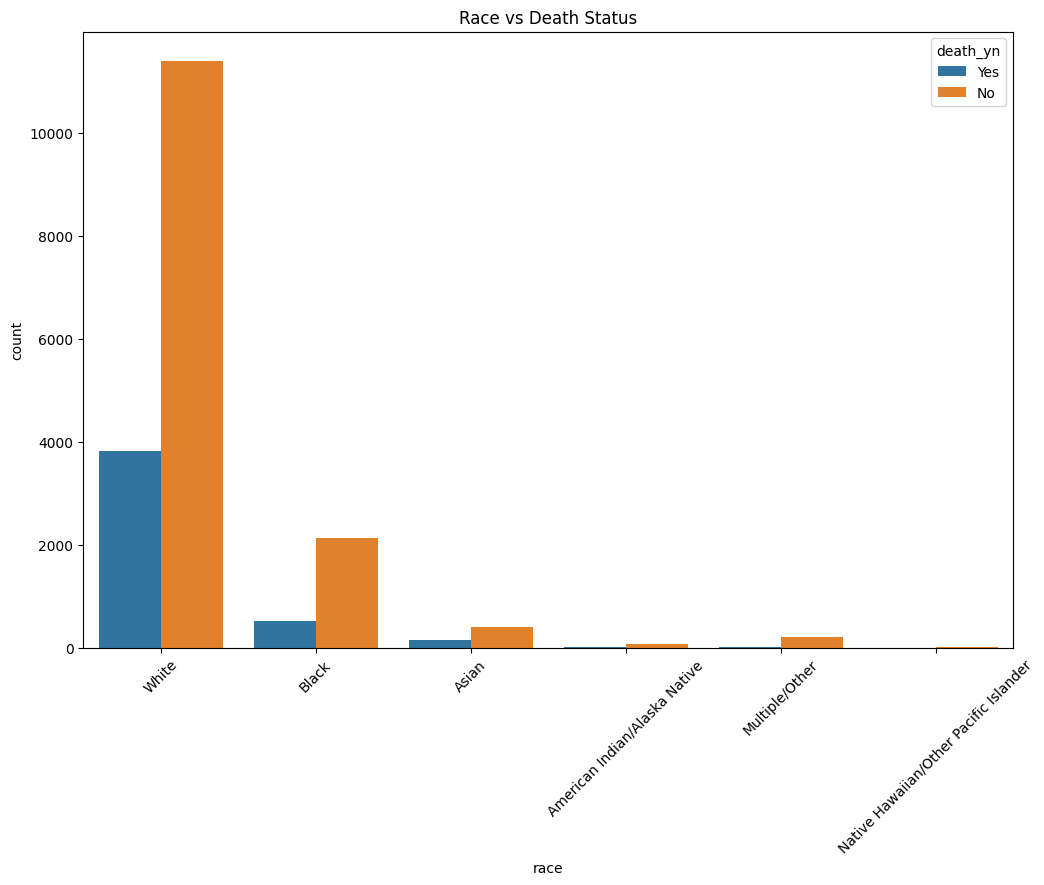

In [66]:
# Categorical-Categorical: race vs death_yn
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='race', hue='death_yn')
plt.xticks(rotation=45)
plt.title('Race vs Death Status')
plt.show()

Pair selection rationale:
The pair "death" and "race" was chosen to investigate the relationship between race and the likelihood of death due to COVID-19. Analyzing the impact of race on COVID-19 mortality can help identify potential disparities in healthcare access, social determinants of health, and other factors that may contribute to differences in mortality rates across racial groups.

Finding (approximate): 
- White: 3,900 deaths and 11,100 survivals
- Black: 500 deaths and 2,000 survivals
- Asian: 1/3 of cases resulted in death (low overall numbers)
- Native American: 1/4 of cases resulted in death (low overall numbers). 

While the absolute numbers of deaths are higher for White individuals, it is important to consider the size of each racial group in the dataset, and the findings suggest that there may be differences in COVID-19 mortality rates between racial groups. For example, Asians seem to have a higher proportion of death compared to other groups, despite having a smaller overall number of cases.

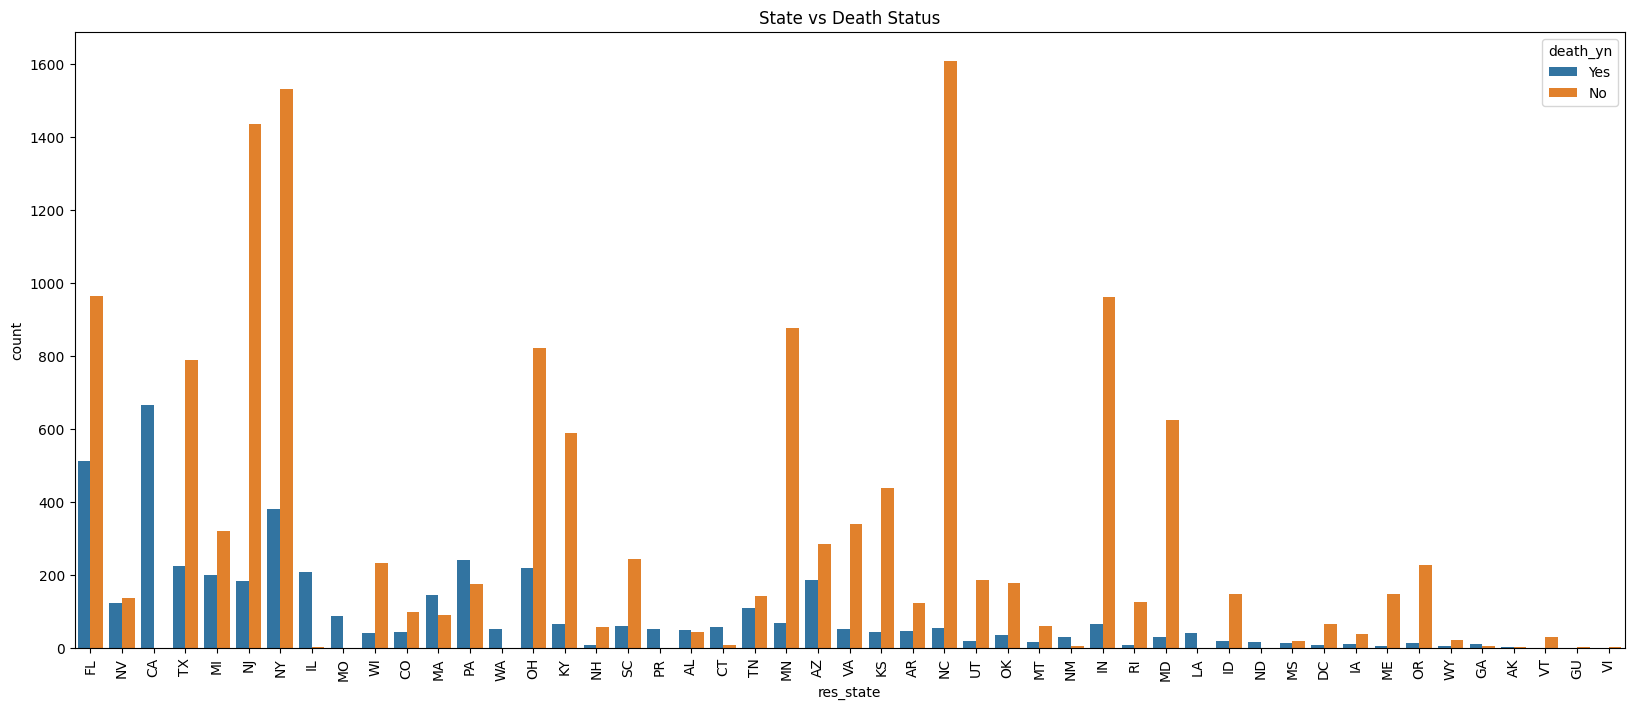

In [67]:
# Categorical-Categorical: state vs death_yn
plt.figure(figsize=(20, 8))  # Increase figure width to accommodate the number of states
sns.countplot(data=df, x='res_state', hue='death_yn')
plt.title('State vs Death Status')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Pair selection rationale:
The pair "death" and "state" was chosen to investigate the relationship between the geographic location and the likelihood of death due to COVID-19. 

Findings:
The table shows the count of COVID-19 cases by the state of residence and death status. States with the highest numbers of deaths were New York, New Jersey, and Florida, with 1533, 1437, and 965 deaths, respectively. In contrast, some states such as Alaska, Georgia, and Missouri had very few deaths. Additionally, some states such as California and Washington had no deaths in the data set. The table also shows that the majority of states had a larger number of cases with no death outcomes, indicating that death due to COVID-19 is a relatively rare outcome across most states. The relationship between the geographic location and the likelihood of death due to COVID-19 can provide insights into potential variations in mortality rates across different states, and can be useful for developing targeted public health interventions and strategies.

DATA ANALYTICS COMP47350 Homework I Question IV

Transform, extend or combine the existing features to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. 

In the grading, consideration will be given to the creativity and domain knowledge shown in preparing the new features. Use code to show that your new features are indeed useful for the target prediction problem. Add these features to your clean dataset and save it as a CSV file with a self explanatory name.

(i) Age-Sex feature

The Age-Sex feature is useful for mapping death prediction as it shows the demographic groups that are at higher risk of COVID-19 related deaths. In the graph generated above, we can see that the most deaths occur in the 65+ age group for both males and females, followed by the 50-64 age group for males and females, respectively. The code below creates a new column for age-sex group, computes the proportion of deaths for each age-sex group, and generates a bar plot to show the proportion of deaths by age-sex group. The plot reveals that males between 50-64 tend to be at a much higher risk of mortality compared to their female counterparts. 

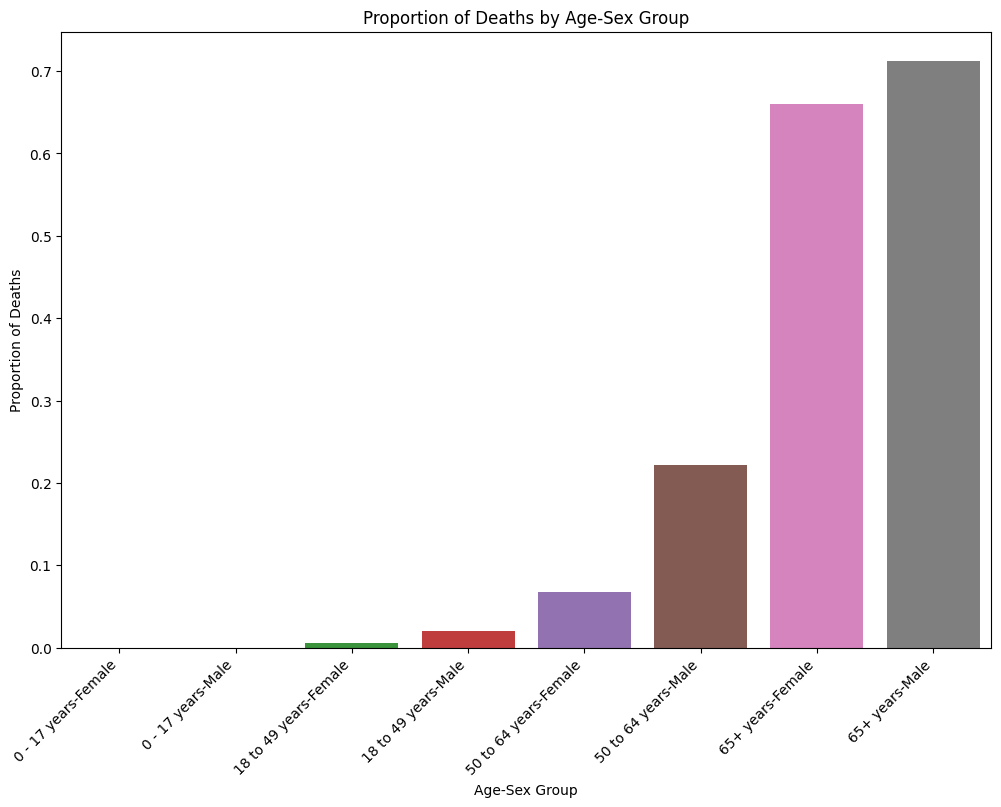

In [68]:
# Create a new column for age-sex group
df['age_sex_group'] = df['age_group'] + '-' + df['sex']

# Create a contingency table for age-sex group vs death
age_sex_vs_death = pd.crosstab(df['age_sex_group'], df['death_yn'], margins=True)

# Compute the proportion of deaths for each age-sex group
age_sex_vs_death['proportion_death'] = age_sex_vs_death['Yes'] / age_sex_vs_death['All']

# Remove the 'All' row
age_sex_vs_death = age_sex_vs_death.drop(index='All')

# Create a bar plot of proportion of deaths by age-sex group
plt.figure(figsize=(12,8))
sns.barplot(data=age_sex_vs_death, x=age_sex_vs_death.index, y='proportion_death')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Age-Sex Group')
plt.ylabel('Proportion of Deaths')
plt.title('Proportion of Deaths by Age-Sex Group')
plt.show()

(ii) Seasonality of COVID-19 deaths

The seasonality of COVID-19 deaths is useful to understand the potential seasonal variations in the virus's spread or healthcare system capacity, which can impact death outcomes. In the code below, a new feature 'death_season' is created based on the month of death, which is then used to visualise the relationship between death season and death outcome. The plot shows that most deaths occur in winter (but more cases overall), while the least deaths occur in summer, with fall and spring having similar death rates. Interestingly, the death rate seems to be higher for both winter and spring than for other months. 

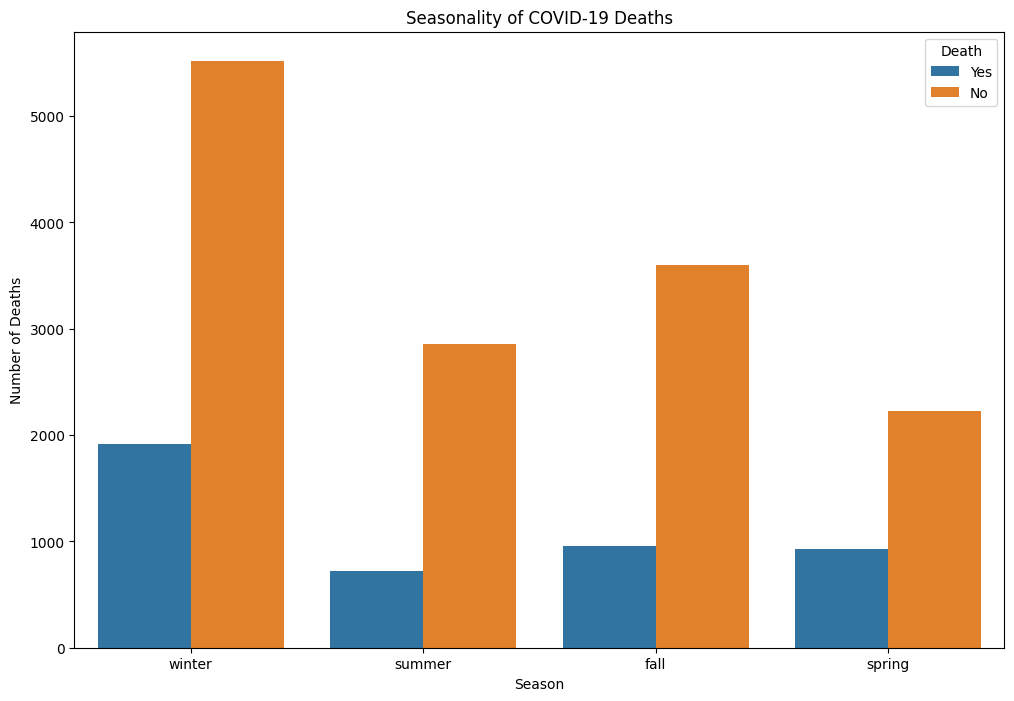

In [70]:
# Create a dictionary to map months to seasons
seasons = {
    'winter': ['12', '01', '02'],
    'spring': ['03', '04', '05'],
    'summer': ['06', '07', '08'],
    'fall': ['09', '10', '11']
}

# Extract just the month from the 'case_month' column
df['month'] = df['case_month'].apply(lambda x: x.split('-')[1])

# Create a new column for the season of the death
df['death_season'] = df['month'].apply(lambda x: next(season for season, months in seasons.items() if x in months))

# Categorical-Categorical: death_season vs death_yn
plt.figure(figsize=(12, 8))
sns.countplot(x='death_season', hue='death_yn', data=df)
plt.title('Seasonality of COVID-19 Deaths')
plt.xlabel('Season')
plt.ylabel('Number of Deaths')
plt.legend(title='Death')
plt.show()

(iii) Monthly death count per State

The monthly death count per state can help us understand the impact of COVID-19 on different regions. In the code provided, the 'case_month' column is converted to a datetime object and sorted by date. The 'death_yn' column is transformed into numeric data by replacing "Yes" with 1 and "No" with 0. The monthly death count is then calculated using the 'res_state' and 'case_month' columns, and the resulting data is visualized.

These plots display the relationship between death count and time across states, with the x-axis showing only the first and last months for clarity. The visualizations reveal variations in death counts among states over time, which can provide insights into the effectiveness of healthcare systems and policy responses in different regions. 

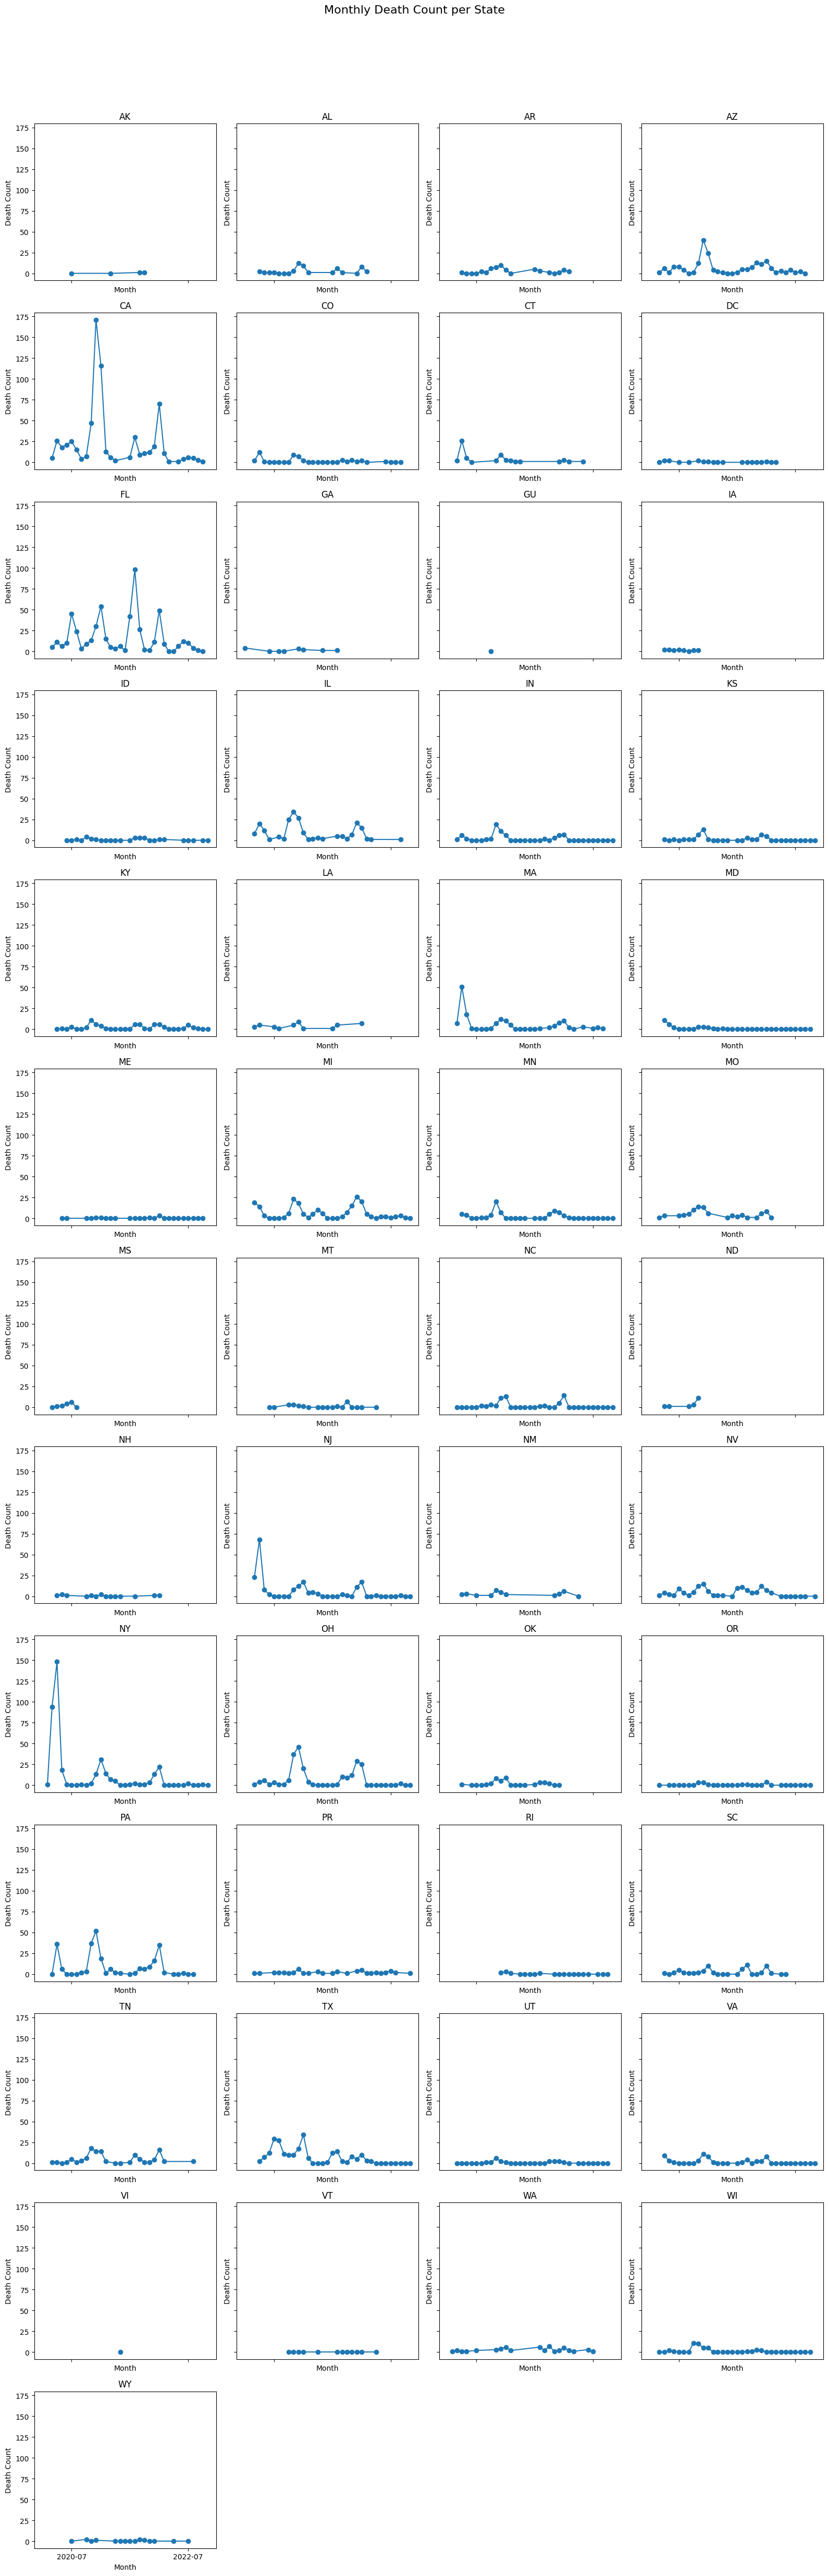

In [89]:
# Convert case_month to datetime object and sort by date
df['case_month'] = pd.to_datetime(df['case_month'], format='%Y-%m')
df = df.sort_values('case_month')

# Replace "Yes" with 1 and "No" with 0 in the 'death_yn' column
df['death_yn'] = df['death_yn'].replace({'Yes': 1, 'No': 0})

# Calculate monthly death count per state
monthly_death_count = df.groupby(['res_state', 'case_month'])['death_yn'].sum().reset_index(name='death_count')

# Get the unique states and number of subplots
states = monthly_death_count['res_state'].unique()
n_states = len(states)

# Define the grid size for subplots
n_cols = 4
n_rows = (n_states + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4), sharex=True, sharey=True)
fig.suptitle('Monthly Death Count per State', fontsize=16)

# Plot the data for each state
for i, state in enumerate(states):
    row, col = i // n_cols, i % n_cols
    ax = axes[row, col]
    state_data = monthly_death_count[monthly_death_count['res_state'] == state]
    ax.plot(state_data['case_month'], state_data['death_count'], marker='o')
    ax.set_title(state)
    ax.set_xlabel('Month')
    ax.set_ylabel('Death Count')

    # Set x-axis ticks to display only first and last month
    first_month = state_data['case_month'].iloc[0]
    last_month = state_data['case_month'].iloc[-1]
    ax.set_xticks([first_month, last_month])
    ax.set_xticklabels([first_month.strftime('%Y-%m'), last_month.strftime('%Y-%m')])

# Remove empty subplots if there are any
for i in range(n_states, n_rows * n_cols):
    row, col = i // n_cols, i % n_cols
    fig.delaxes(axes[row, col])

# Adjust layout and show the plot
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Add these features to your clean dataset and save it as a CSV file with a self explanatory name.

Minor tidying up measures also applied. 

In [102]:
# Merge the main dataset with the 'monthly_death_count' feature
df = df.merge(monthly_death_count, on=['res_state', 'case_month'])

# Rename the 'death_count' column
df.rename(columns={'death_count': 'Monthly_death_count_per_State'}, inplace=True)

# Save the updated dataset to a CSV file
df.to_csv('covid19-cdc-22202474-cleanv3-final.csv', index=False)